In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import datetime

In [2]:
columns_corn = [ 'Date',
            'Corn Price',
            'CPI',
           	'GPR	Country',
            'GPR',
           	'US Wheat Futures',
           	'Brent Oil Futures',
           	'London Wheat Futures',
           	'Exch Rate',
             'T',
             'TM',
             'Tm',
             'H',
             'PP',
           	 'VV',
             'V',
             'VM',
             'RA',
           	 'SN',
             'TS',
             'FG'  ]

columns_barley = [ 'Date',
            'Barley Price',
            'CPI',
           	'GPR	Country',
            'GPR',
           	'US Wheat Futures',
           	'Brent Oil Futures',
           	'London Wheat Futures',
           	'Exch Rate',
             'T',
             'TM',
             'Tm',
             'H',
             'PP',
           	 'VV',
             'V',
             'VM',
             'RA',
           	 'SN',
             'TS',
             'FG'  ]

df_corn = pd.read_excel('Corn Data.xlsx', header = None, skiprows = 1, names = columns_corn)
df_barley = pd.read_excel('Barley Data.xlsx', header = None, skiprows = 1, names = columns_barley)

In [3]:
df_corn.head()

,Date,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
0,2022-02-25,7900,141.7,178.90,322,843.00,97.93,231.00,30.0500,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
1,2022-02-18,7750,141.7,178.90,322,797.00,93.54,222.50,28.4014,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
2,2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
3,2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
4,2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,...,-5.1,82.325,51.3725,9.225,16.625,30.3,10.5,20.5,0.0,1.5


In [4]:
df_corn.tail()

,Date,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
629,2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.050,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
630,2010-01-22,1240,98.4,91.58,1,498.13,72.83,100.85,8.110,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
631,2010-01-15,1250,98.4,91.58,1,509.88,77.11,104.00,8.125,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
632,2010-01-08,1240,98.4,91.58,1,568.13,81.37,109.25,8.075,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
633,2010-01-01,1240,98.4,91.58,1,540.75,80.12,110.45,8.050,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75


In [5]:
df_barley.head()

,Date,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
0,2022-02-25,7650,141.7,178.90,322,843.00,97.93,231.00,30.0500,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
1,2022-02-18,7650,141.7,178.90,322,797.00,93.54,222.50,28.4014,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
2,2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
3,2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
4,2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.15,...,-5.9,83.425,12.3825,8.100,16.75,31.0,11.25,16.75,0.0,6.00


In [6]:
df_barley.tail()

,Date,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
629,2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.050,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
630,2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.110,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
631,2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.125,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
632,2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.075,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
633,2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.050,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

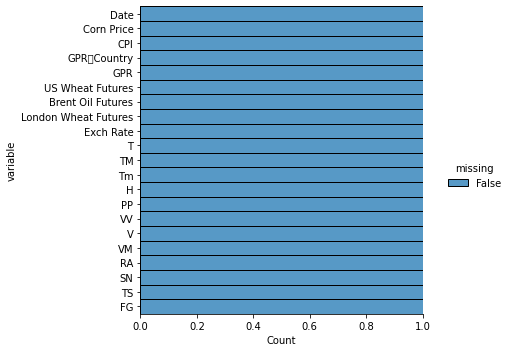

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_corn.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

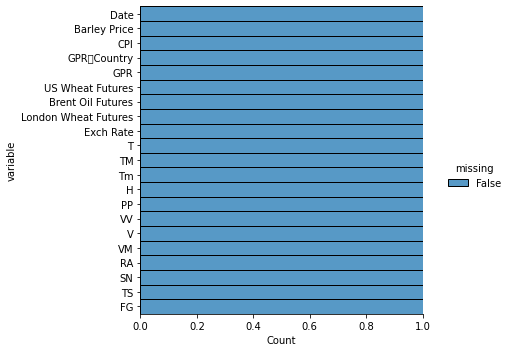

In [8]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_barley.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [9]:
df_corn.index = df_corn["Date"]
df_corn.index = pd.to_datetime(df_corn.index)
df_corn.drop(['Date'], axis='columns', inplace=True)
df_corn = df_corn.sort_index()

In [10]:
df_barley.index = df_barley["Date"]
df_barley.index = pd.to_datetime(df_barley.index)
df_barley.drop(['Date'], axis='columns', inplace=True)
df_barley = df_barley.sort_index()

In [11]:
df_corn["Exchange Rate Change 1"] = df_corn["Exch Rate"].pct_change(periods=1)*100
df_corn["Exchange Rate Change 4"] = df_corn["Exch Rate"].pct_change(periods=4)*100

In [12]:
df_corn.head()

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1240,98.4,91.58,1,540.75,80.12,110.45,8.050,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,NaN,NaN
2010-01-08,1240,98.4,91.58,1,568.13,81.37,109.25,8.075,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,0.310559,NaN
2010-01-15,1250,98.4,91.58,1,509.88,77.11,104.00,8.125,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,0.619195,NaN
2010-01-22,1240,98.4,91.58,1,498.13,72.83,100.85,8.110,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,-0.184615,NaN
2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.050,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,-0.739827,0.0


In [13]:
df_corn.tail()

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,...,51.3725,9.225,16.625,30.3,10.5,20.5,0.0,1.5,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,-2.013816,2.250203
2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,-0.258234,0.149288
2022-02-18,7750,141.7,178.90,322,797.00,93.54,222.50,28.4014,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,1.283816,0.709542
2022-02-25,7900,141.7,178.90,322,843.00,97.93,231.00,30.0500,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,5.804643,4.733757


In [14]:
df_barley["Exchange Rate Change 1"] = df_barley["Exch Rate"].pct_change(periods=1)*100
df_barley["Exchange Rate Change 4"] = df_barley["Exch Rate"].pct_change(periods=4)*100

In [15]:
df_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,NaN,NaN
2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.0750,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.310559,NaN
2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.1250,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.619195,NaN
2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.1100,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.184615,NaN
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.75,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [16]:
df_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,NaN,NaN
2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.0750,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.310559,NaN
2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.1250,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.619195,NaN
2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.1100,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.184615,NaN
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.75,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [17]:
df_corn = df_corn.dropna()
df_barley = df_barley.dropna()

In [18]:
X_train_corn, X_test_corn = train_test_split(df_corn, train_size=0.8, shuffle=False)
X_train_barley, X_test_barley = train_test_split(df_barley, train_size=0.8, shuffle=False)

In [19]:
X_train_corn

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.0500,-9.375,-6.2,...,47.1800,6.950,13.825,21.4,5.25,16.75,0.00,4.75,-0.739827,0.000000
2010-02-05,1210,94.0,80.73,6,474.13,69.59,100.30,8.0700,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,0.248447,-0.061920
2010-02-12,1220,94.0,80.73,6,485.63,72.90,98.00,8.0600,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.123916,-0.800000
2010-02-19,1240,94.0,80.73,6,488.88,78.19,95.40,8.0430,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.210918,-0.826141
2010-02-26,1240,94.0,80.73,6,519.13,77.59,96.50,8.0220,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,4100,93.2,103.40,15,451.25,60.43,133.10,25.1100,20.325,27.6,...,24.8300,10.900,9.575,20.7,7.00,0.00,2.75,0.50,0.039841,-1.779777
2019-09-06,3600,92.4,90.37,23,460.25,61.54,135.85,25.0750,15.225,22.4,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-0.139387,-0.570210
2019-09-13,3550,92.4,90.37,23,485.75,60.22,136.05,24.7913,15.225,22.4,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-1.131406,-1.543685


In [20]:
X_test_corn

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,3600,96.5,97.84,34,490.50,58.37,138.80,24.7700,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,2.732340,-1.216351
2019-10-11,3600,96.5,97.84,34,508.00,60.51,137.35,24.6500,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.484457,-0.569958
2019-10-18,3650,96.5,97.84,34,532.25,59.42,137.75,25.0802,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,1.745233,2.766646
2019-10-25,3700,96.5,97.84,34,517.75,62.02,139.85,25.0800,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.000797,4.018050
2019-11-01,3900,96.1,73.08,31,516.00,61.69,140.30,24.8694,4.350,8.2,...,28.3775,7.700,12.025,24.5,13.0,1.25,0.25,11.00,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,...,51.3725,9.225,16.625,30.3,10.5,20.50,0.00,1.50,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-2.013816,2.250203
2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-0.258234,0.149288


In [21]:
X_train_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.100,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
2010-02-05,845,94.0,80.73,6,474.13,69.59,100.30,8.0700,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,0.248447,-0.061920
2010-02-12,850,94.0,80.73,6,485.63,72.90,98.00,8.0600,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.123916,-0.800000
2010-02-19,870,94.0,80.73,6,488.88,78.19,95.40,8.0430,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.210918,-0.826141
2010-02-26,860,94.0,80.73,6,519.13,77.59,96.50,8.0220,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,4300,93.2,103.40,15,451.25,60.43,133.10,25.1100,22.725,30.7,...,30.8575,10.000,13.150,25.9,5.00,0.00,2.00,0.50,0.039841,-1.779777
2019-09-06,4000,92.4,90.37,23,460.25,61.54,135.85,25.0750,17.575,25.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-0.139387,-0.570210
2019-09-13,4000,92.4,90.37,23,485.75,60.22,136.05,24.7913,17.575,25.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-1.131406,-1.543685


In [22]:
X_test_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,4000,96.5,97.84,34,490.50,58.37,138.80,24.7700,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,2.732340,-1.216351
2019-10-11,4000,96.5,97.84,34,508.00,60.51,137.35,24.6500,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.484457,-0.569958
2019-10-18,4000,96.5,97.84,34,532.25,59.42,137.75,25.0802,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,1.745233,2.766646
2019-10-25,4100,96.5,97.84,34,517.75,62.02,139.85,25.0800,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.000797,4.018050
2019-11-01,4100,96.1,73.08,31,516.00,61.69,140.30,24.8694,6.700,12.4,...,20.9500,7.600,16.775,28.7,9.50,0.50,0.00,12.50,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.750,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [23]:
y_train_corn = X_train_corn.pop('Corn Price')
y_test_corn = X_test_corn.pop('Corn Price')
y_train_barley = X_train_barley.pop('Barley Price')
y_test_barley = X_test_barley.pop('Barley Price')

In [24]:
y_train_corn

Date
2010-01-29    1230
2010-02-05    1210
2010-02-12    1220
2010-02-19    1240
2010-02-26    1240
              ... 
2019-08-30    4100
2019-09-06    3600
2019-09-13    3550
2019-09-20    3550
2019-09-27    3550
Name: Corn Price, Length: 504, dtype: int64

In [25]:
X_train_corn

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,98.4,91.58,1,473.13,71.46,99.85,8.0500,-9.375,-6.2,-14.2,...,47.1800,6.950,13.825,21.4,5.25,16.75,0.00,4.75,-0.739827,0.000000
2010-02-05,94.0,80.73,6,474.13,69.59,100.30,8.0700,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,0.248447,-0.061920
2010-02-12,94.0,80.73,6,485.63,72.90,98.00,8.0600,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.123916,-0.800000
2010-02-19,94.0,80.73,6,488.88,78.19,95.40,8.0430,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.210918,-0.826141
2010-02-26,94.0,80.73,6,519.13,77.59,96.50,8.0220,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,93.2,103.40,15,451.25,60.43,133.10,25.1100,20.325,27.6,11.7,...,24.8300,10.900,9.575,20.7,7.00,0.00,2.75,0.50,0.039841,-1.779777
2019-09-06,92.4,90.37,23,460.25,61.54,135.85,25.0750,15.225,22.4,7.2,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-0.139387,-0.570210
2019-09-13,92.4,90.37,23,485.75,60.22,136.05,24.7913,15.225,22.4,7.2,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-1.131406,-1.543685


In [26]:
y_test_corn

Date
2019-10-04    3600
2019-10-11    3600
2019-10-18    3650
2019-10-25    3700
2019-11-01    3900
              ... 
2022-01-28    7750
2022-02-04    7700
2022-02-11    7650
2022-02-18    7750
2022-02-25    7900
Name: Corn Price, Length: 126, dtype: int64

In [27]:
X_test_corn

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,96.5,97.84,34,490.50,58.37,138.80,24.7700,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,2.732340,-1.216351
2019-10-11,96.5,97.84,34,508.00,60.51,137.35,24.6500,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.484457,-0.569958
2019-10-18,96.5,97.84,34,532.25,59.42,137.75,25.0802,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,1.745233,2.766646
2019-10-25,96.5,97.84,34,517.75,62.02,139.85,25.0800,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.000797,4.018050
2019-11-01,96.1,73.08,31,516.00,61.69,140.30,24.8694,4.350,8.2,0.5,...,28.3775,7.700,12.025,24.5,13.0,1.25,0.25,11.00,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,-5.1,...,51.3725,9.225,16.625,30.3,10.5,20.50,0.00,1.50,1.739282,5.291009
2022-02-04,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,-2.5,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-2.013816,2.250203
2022-02-11,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,-2.5,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-0.258234,0.149288


In [28]:
y_train_barley

Date
2010-01-29     850
2010-02-05     845
2010-02-12     850
2010-02-19     870
2010-02-26     860
              ... 
2019-08-30    4300
2019-09-06    4000
2019-09-13    4000
2019-09-20    4000
2019-09-27    4000
Name: Barley Price, Length: 504, dtype: int64

In [29]:
X_train_barley

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,-9.6,...,52.8400,6.375,17.100,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
2010-02-05,94.0,80.73,6,474.13,69.59,100.30,8.0700,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,0.248447,-0.061920
2010-02-12,94.0,80.73,6,485.63,72.90,98.00,8.0600,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.123916,-0.800000
2010-02-19,94.0,80.73,6,488.88,78.19,95.40,8.0430,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.210918,-0.826141
2010-02-26,94.0,80.73,6,519.13,77.59,96.50,8.0220,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,93.2,103.40,15,451.25,60.43,133.10,25.1100,22.725,30.7,15.2,...,30.8575,10.000,13.150,25.9,5.00,0.00,2.00,0.50,0.039841,-1.779777
2019-09-06,92.4,90.37,23,460.25,61.54,135.85,25.0750,17.575,25.1,10.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-0.139387,-0.570210
2019-09-13,92.4,90.37,23,485.75,60.22,136.05,24.7913,17.575,25.1,10.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-1.131406,-1.543685


In [30]:
y_test_barley

Date
2019-10-04    4000
2019-10-11    4000
2019-10-18    4000
2019-10-25    4100
2019-11-01    4100
              ... 
2022-01-28    7600
2022-02-04    7700
2022-02-11    7600
2022-02-18    7650
2022-02-25    7650
Name: Barley Price, Length: 126, dtype: int64

In [31]:
X_test_barley

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,96.5,97.84,34,490.50,58.37,138.80,24.7700,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,2.732340,-1.216351
2019-10-11,96.5,97.84,34,508.00,60.51,137.35,24.6500,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.484457,-0.569958
2019-10-18,96.5,97.84,34,532.25,59.42,137.75,25.0802,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,1.745233,2.766646
2019-10-25,96.5,97.84,34,517.75,62.02,139.85,25.0800,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.000797,4.018050
2019-11-01,96.1,73.08,31,516.00,61.69,140.30,24.8694,6.700,12.4,1.4,...,20.9500,7.600,16.775,28.7,9.50,0.50,0.00,12.50,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,-5.9,...,12.3825,8.100,16.750,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,-1.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,-1.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler_barley = StandardScaler()
scaler_barley.fit(X_train_barley)
X_train_barley = scaler_barley.transform(X_train_barley)
X_test_barley = scaler_barley.transform(X_test_barley)

In [38]:
scaler_corn = StandardScaler()
scaler_corn.fit(X_train_corn)
X_train_corn = scaler_corn.transform(X_train_corn)
X_test_corn = scaler_corn.transform(X_test_corn)

#**SVR - кукурудза**

In [61]:
from sklearn.svm import SVR

In [68]:
i = 0
dt_dict = {}
C = [10, 50, 100, 150, 200, 250, 300, 350, 400, 500, 1000]

for C_ in C:
  i = i + 1
  svr_1 = SVR(kernel="linear", C=C_)
  model_dt=svr_1.fit(X_train_corn,y_train_corn)
  y_dt_pred = model_dt.predict(X_train_corn)
  rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
  print('Модель '+str(i) + ' C: ' + str(C_) + ' RMSE='+str(rmse))
  dt_dict[i]=rmse

Модель 1 C: 10 RMSE=302.5876403351216
Модель 2 C: 50 RMSE=242.48259782012732
Модель 3 C: 100 RMSE=237.4109979742577
Модель 4 C: 150 RMSE=234.32637873841387
Модель 5 C: 200 RMSE=233.58131103465075
Модель 6 C: 250 RMSE=233.54836505976246
Модель 7 C: 300 RMSE=233.61487817706916
Модель 8 C: 350 RMSE=233.52651753222617
Модель 9 C: 400 RMSE=233.5323831129622
Модель 10 C: 500 RMSE=233.2161309024068
Модель 11 C: 1000 RMSE=234.00353943972854


In [69]:
dt_dict_for_plot = pd.DataFrame()
dt_dict_for_plot['RMSE'] = list(dt_dict.values())
dt_dict_for_plot['ind'] = list(dt_dict.keys())
dt_dict_for_plot['ind'] = dt_dict_for_plot['ind'].astype(str)
dt_dict_for_plot = dt_dict_for_plot.sort_values(by='RMSE')
dt_dict_for_plot

,RMSE,ind
9,233.216131,10
7,233.526518,8
8,233.532383,9
5,233.548365,6
4,233.581311,5
6,233.614878,7
10,234.003539,11
3,234.326379,4
2,237.410998,3
1,242.482598,2


Text(0, 0.5, 'RMSE')

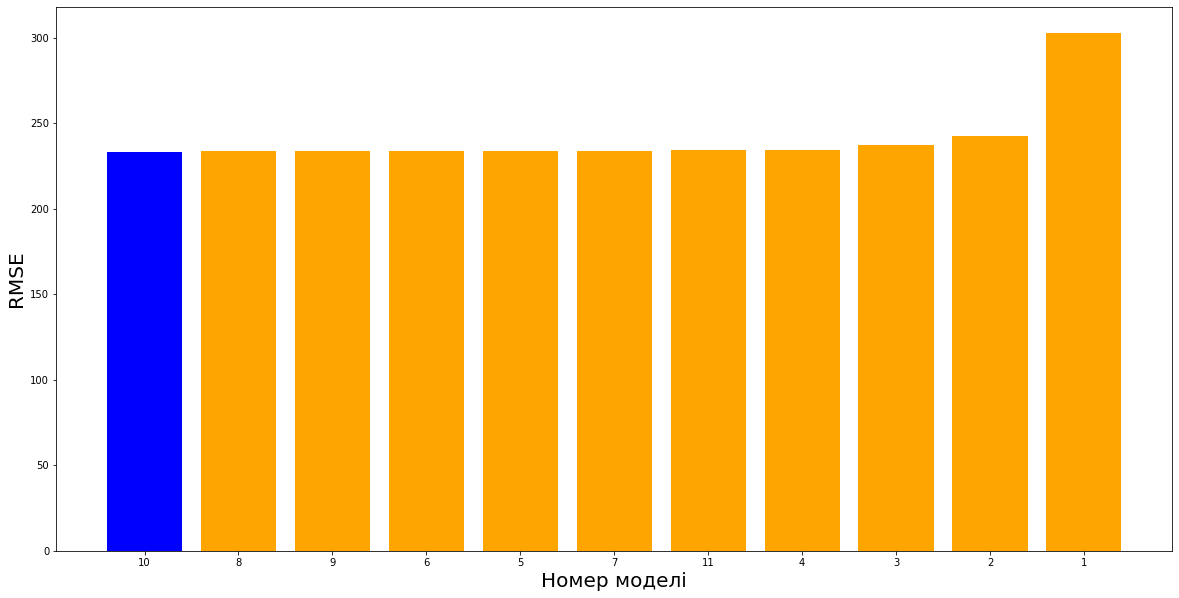

In [70]:
profit_color = [{r<233.3: 'blue', r>=233.3: 'orange'}[True] for r in dt_dict_for_plot['RMSE']]

fig,ax=plt.subplots(figsize=(20,10))

ax.bar(dt_dict_for_plot['ind'],dt_dict_for_plot['RMSE'], color=profit_color)
ax.set_xlabel('Номер моделі', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)

In [74]:
svr_1 = SVR(kernel="linear", C=500)
model_dt=svr_1.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_train_corn)
rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
print(' RMSE='+str(rmse))

 RMSE=233.2161309024068


In [75]:
corn_results_train = pd.DataFrame(y_train_corn.copy())
corn_results_train['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_train

,Corn Price,pred
Date,,
2010-01-29,1230,928.947290
2010-02-05,1210,903.975494
2010-02-12,1220,907.962528
2010-02-19,1240,924.883358
2010-02-26,1240,873.116626
...,...,...
2019-08-30,4100,4117.313609
2019-09-06,3600,4025.192132
2019-09-13,3550,3947.177992


In [77]:
svr_1 = SVR(kernel="linear", C=500)
model_dt=svr_1.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_test_corn)
rmse=np.sqrt(mean_squared_error(y_test_corn,y_dt_pred))
print(' RMSE='+str(rmse))

 RMSE=2086.089656709625


In [78]:
corn_results_test = pd.DataFrame(y_test_corn.copy())
corn_results_test['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_test

,Corn Price,pred
Date,,
2019-10-04,3600,3725.388188
2019-10-11,3600,3697.876929
2019-10-18,3650,3687.010780
2019-10-25,3700,3726.205038
2019-11-01,3900,3596.263627
...,...,...
2022-01-28,7750,5522.308677
2022-02-04,7700,5358.988600
2022-02-11,7650,5327.204742


In [79]:
corn_pred = pd.concat([corn_results_train, corn_results_test])

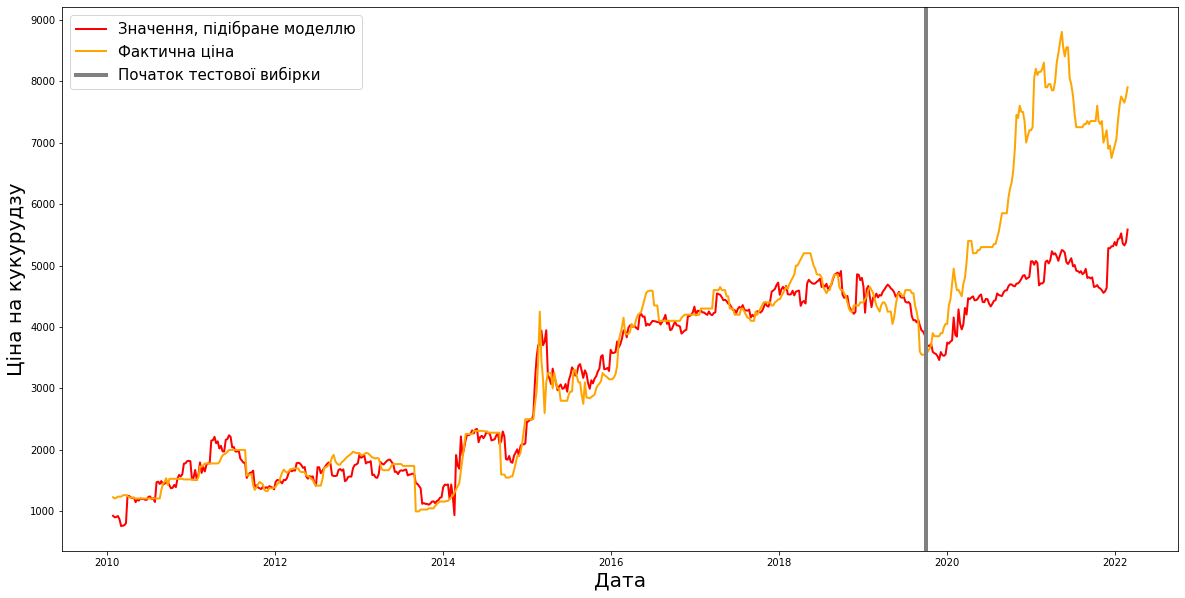

In [80]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(corn_pred.index,corn_pred['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(corn_pred.index,corn_pred['Corn Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на кукурудзу' ,fontsize=20)

ax.axvline(x=datetime.datetime(2019, 10, 4),linewidth=4, color='grey', label = 'Початок тестової вибірки')

ax.legend(loc='upper left', fontsize=15)

In [85]:
i = 0
dt_dict = {}
C = [10, 50, 100, 150, 200, 250, 300, 350, 400, 500, 1000]
degree = [2, 3, 4]

for C_ in C:
  for degree_ in degree:
    i = i + 1
    svr_2 = SVR(kernel="poly", C=C_, degree=degree_)
    model_dt=svr_2.fit(X_train_corn,y_train_corn)
    y_dt_pred = model_dt.predict(X_train_corn)
    rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
    print('Модель '+str(i) + ' C: ' + str(C_) + ' Degree: ' + str(degree_) + ' RMSE='+str(rmse))
    dt_dict[i]=rmse

Модель 1 C: 10 Degree: 2 RMSE=1370.5782840635056
Модель 2 C: 10 Degree: 3 RMSE=1173.1004375956645
Модель 3 C: 10 Degree: 4 RMSE=1320.3669110285239
Модель 4 C: 50 Degree: 2 RMSE=1256.3014846985616
Модель 5 C: 50 Degree: 3 RMSE=850.3267221879806
Модель 6 C: 50 Degree: 4 RMSE=1170.4392550727225
Модель 7 C: 100 Degree: 2 RMSE=1154.9436318533687
Модель 8 C: 100 Degree: 3 RMSE=701.6015122709086
Модель 9 C: 100 Degree: 4 RMSE=1074.80687989287
Модель 10 C: 150 Degree: 2 RMSE=1094.73765957263
Модель 11 C: 150 Degree: 3 RMSE=628.3897154972368
Модель 12 C: 150 Degree: 4 RMSE=1018.7347365197918
Модель 13 C: 200 Degree: 2 RMSE=1048.9516056687723
Модель 14 C: 200 Degree: 3 RMSE=583.7707903437653
Модель 15 C: 200 Degree: 4 RMSE=974.5134698626688
Модель 16 C: 250 Degree: 2 RMSE=1013.2085574790624
Модель 17 C: 250 Degree: 3 RMSE=548.6282048216561
Модель 18 C: 250 Degree: 4 RMSE=938.9539168215022
Модель 19 C: 300 Degree: 2 RMSE=986.742937130336
Модель 20 C: 300 Degree: 3 RMSE=522.5385533860458
Модель 21

In [86]:
dt_dict_for_plot = pd.DataFrame()
dt_dict_for_plot['RMSE'] = list(dt_dict.values())
dt_dict_for_plot['ind'] = list(dt_dict.keys())
dt_dict_for_plot['ind'] = dt_dict_for_plot['ind'].astype(str)
dt_dict_for_plot = dt_dict_for_plot.sort_values(by='RMSE')
dt_dict_for_plot

,RMSE,ind
31,344.709082,32
28,450.018245,29
25,481.944301,26
22,500.531287,23
19,522.538553,20
16,548.628205,17
13,583.770790,14
10,628.389715,11
32,675.692144,33
7,701.601512,8


Text(0, 0.5, 'RMSE')

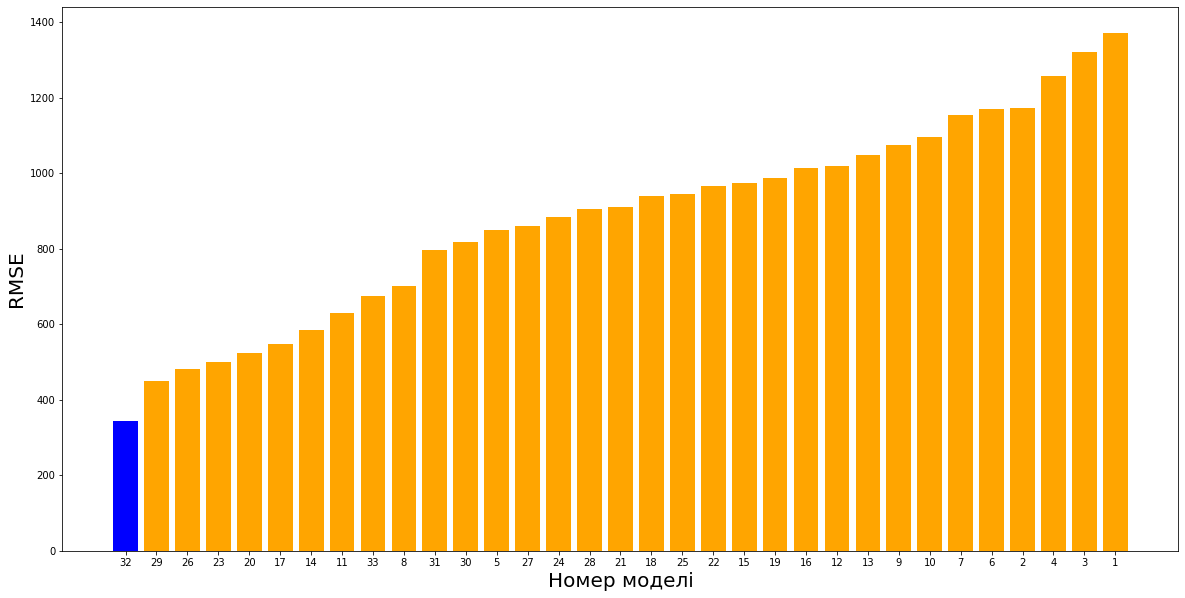

In [87]:
profit_color = [{r<344.8: 'blue', r>=344.8: 'orange'}[True] for r in dt_dict_for_plot['RMSE']]

fig,ax=plt.subplots(figsize=(20,10))

ax.bar(dt_dict_for_plot['ind'],dt_dict_for_plot['RMSE'], color=profit_color)
ax.set_xlabel('Номер моделі', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)

In [94]:
svr_2 = SVR(kernel="poly", C=1000, degree=3)
model_dt=svr_2.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_train_corn)
rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
print(str(degree_) + ' RMSE='+str(rmse))

4 RMSE=344.70908150320633


In [95]:
corn_results_train = pd.DataFrame(y_train_corn.copy())
corn_results_train['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_train

,Corn Price,pred
Date,,
2010-01-29,1230,1140.068261
2010-02-05,1210,1213.886145
2010-02-12,1220,1220.100039
2010-02-19,1240,1207.179287
2010-02-26,1240,1178.544028
...,...,...
2019-08-30,4100,4126.553244
2019-09-06,3600,3587.254484
2019-09-13,3550,3549.899976


In [96]:
svr_2 = SVR(kernel="poly", C=1000, degree=3)
model_dt=svr_2.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_test_corn)
rmse=np.sqrt(mean_squared_error(y_test_corn,y_dt_pred))
print(' RMSE='+str(rmse))

 RMSE=2719.936796366298


In [97]:
corn_results_test = pd.DataFrame(y_test_corn.copy())
corn_results_test['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_test

,Corn Price,pred
Date,,
2019-10-04,3600,3686.394861
2019-10-11,3600,3638.245831
2019-10-18,3650,3637.810234
2019-10-25,3700,3652.525251
2019-11-01,3900,4105.354831
...,...,...
2022-01-28,7750,13610.075837
2022-02-04,7700,10886.815832
2022-02-11,7650,10906.722828


In [98]:
corn_pred = pd.concat([corn_results_train, corn_results_test])

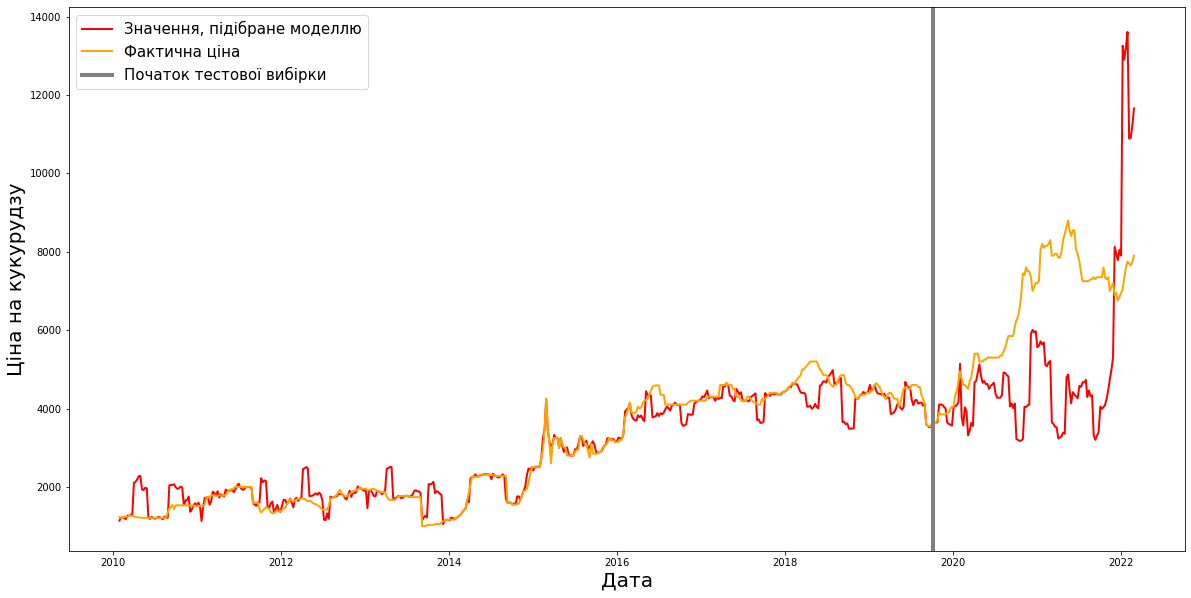

In [99]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(corn_pred.index,corn_pred['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(corn_pred.index,corn_pred['Corn Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на кукурудзу' ,fontsize=20)

ax.axvline(x=datetime.datetime(2019, 10, 4),linewidth=4, color='grey', label = 'Початок тестової вибірки')

ax.legend(loc='upper left', fontsize=15)

In [103]:
i = 0
dt_dict = {}
C = [10, 50, 100, 150, 200, 250, 300, 350, 400, 500, 1000]
gamma = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

for C_ in C:
  for gamma_ in gamma:
    i = i + 1
    svr_3 = SVR(kernel="rbf", C=C_, gamma=gamma_)
    model_dt=svr_3.fit(X_train_corn,y_train_corn)
    y_dt_pred = model_dt.predict(X_train_corn)
    rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
    print('Модель '+str(i) + ' C: ' + str(C_) + ' Gamma: ' + str(gamma_) + ' RMSE='+str(rmse))
    dt_dict[i]=rmse

Модель 1 C: 10 Gamma: 0.0001 RMSE=1425.653425997184
Модель 2 C: 10 Gamma: 0.001 RMSE=1399.702589903485
Модель 3 C: 10 Gamma: 0.01 RMSE=1217.8155835359348
Модель 4 C: 10 Gamma: 0.1 RMSE=1195.538686500992
Модель 5 C: 10 Gamma: 0.2 RMSE=1307.3525718121452
Модель 6 C: 10 Gamma: 0.3 RMSE=1351.7922288734726
Модель 7 C: 50 Gamma: 0.0001 RMSE=1413.6497604734143
Модель 8 C: 50 Gamma: 0.001 RMSE=1273.4443714074198
Модель 9 C: 50 Gamma: 0.01 RMSE=837.6719885408744
Модель 10 C: 50 Gamma: 0.1 RMSE=681.4392569607567
Модель 11 C: 50 Gamma: 0.2 RMSE=899.019798444162
Модель 12 C: 50 Gamma: 0.3 RMSE=1066.3970090442624
Модель 13 C: 100 Gamma: 0.0001 RMSE=1398.706549114018
Модель 14 C: 100 Gamma: 0.001 RMSE=1136.8590589459209
Модель 15 C: 100 Gamma: 0.01 RMSE=615.963004970323
Модель 16 C: 100 Gamma: 0.1 RMSE=457.6243544571391
Модель 17 C: 100 Gamma: 0.2 RMSE=596.2688725244959
Модель 18 C: 100 Gamma: 0.3 RMSE=773.5941954494145
Модель 19 C: 150 Gamma: 0.0001 RMSE=1383.8660701486958
Модель 20 C: 150 Gamma: 0

In [104]:
dt_dict_for_plot = pd.DataFrame()
dt_dict_for_plot['RMSE'] = list(dt_dict.values())
dt_dict_for_plot['ind'] = list(dt_dict.keys())
dt_dict_for_plot['ind'] = dt_dict_for_plot['ind'].astype(str)
dt_dict_for_plot = dt_dict_for_plot.sort_values(by='RMSE')
dt_dict_for_plot

,RMSE,ind
64,77.438951,65
65,77.842117,66
63,81.391219,64
57,128.231447,58
58,132.571418,59
...,...,...
18,1383.866070,19
12,1398.706549,13
1,1399.702590,2
6,1413.649760,7


Text(0, 0.5, 'RMSE')

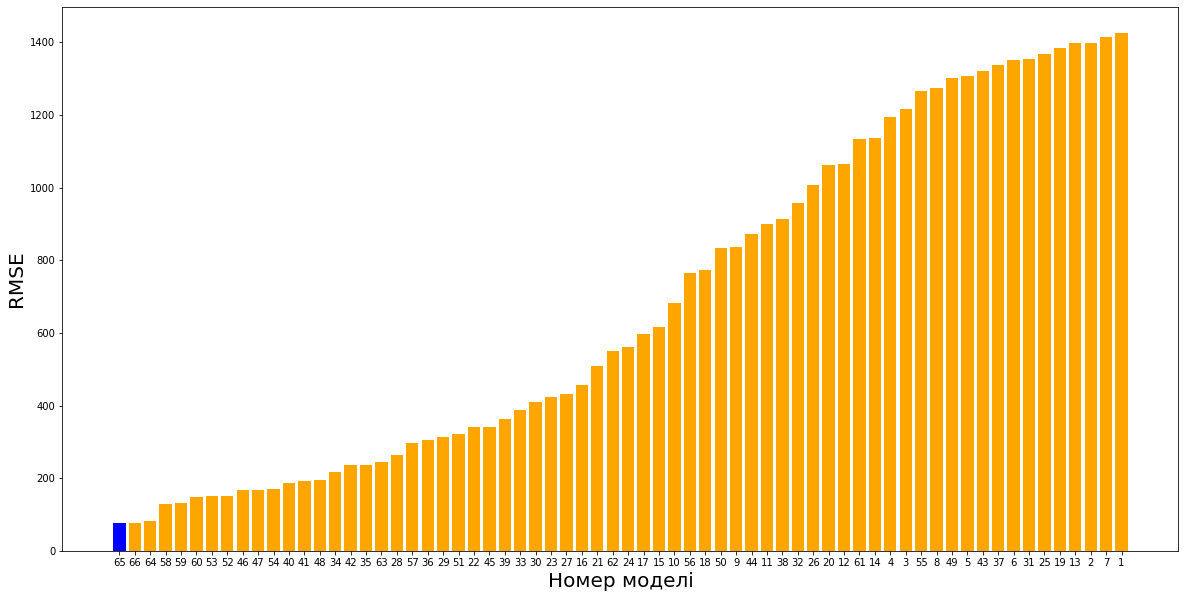

In [105]:
profit_color = [{r<77.5: 'blue', r>=77.5: 'orange'}[True] for r in dt_dict_for_plot['RMSE']]

fig,ax=plt.subplots(figsize=(20,10))

ax.bar(dt_dict_for_plot['ind'],dt_dict_for_plot['RMSE'], color=profit_color)
ax.set_xlabel('Номер моделі', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)

In [134]:
svr_3 = SVR(kernel="rbf", C=1000, gamma=0.2)
model_dt=svr_3.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_train_corn)
rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
print(' RMSE='+str(rmse))

 RMSE=77.43895074412039


In [135]:
corn_results_train = pd.DataFrame(y_train_corn.copy())
corn_results_train['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_train

,Corn Price,pred
Date,,
2010-01-29,1230,1230.099873
2010-02-05,1210,1242.464706
2010-02-12,1220,1233.955741
2010-02-19,1240,1239.900395
2010-02-26,1240,1239.900339
...,...,...
2019-08-30,4100,4241.093268
2019-09-06,3600,3612.075024
2019-09-13,3550,3579.864170


Text(0, 0.5, 'Ціна на кукурудзу')

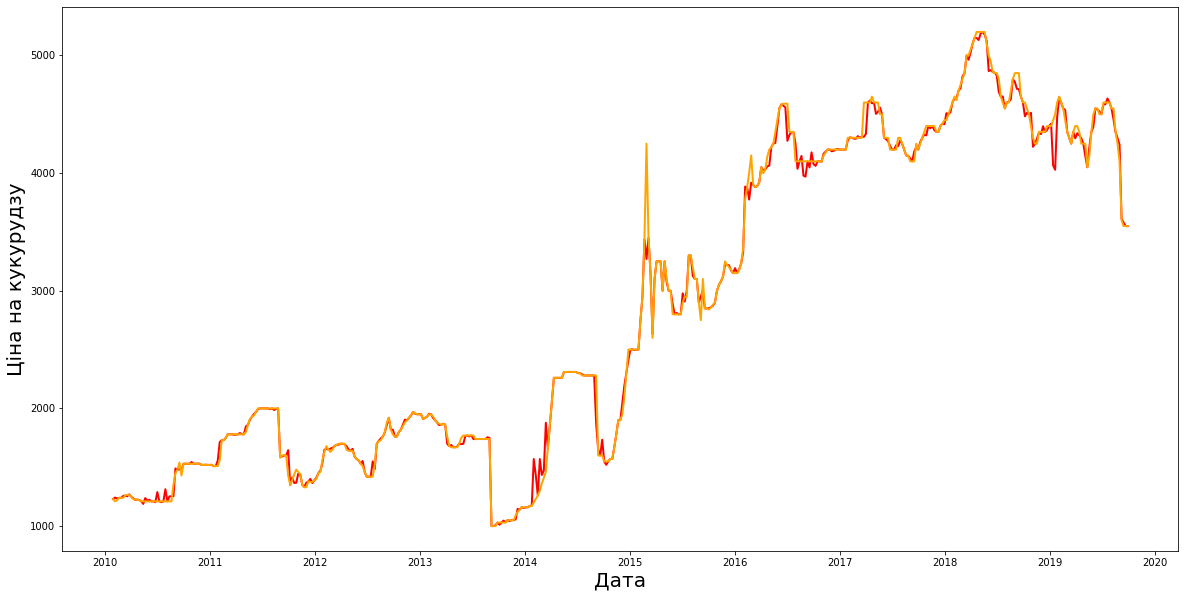

In [136]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(corn_results_train.index,corn_results_train['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(corn_results_train.index,corn_results_train['Corn Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на кукурудзу' ,fontsize=20)

In [137]:
svr_3 = SVR(kernel="rbf", C=10000, gamma=0.001)
model_dt=svr_3.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_train_corn)
rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
print(' RMSE='+str(rmse))

 RMSE=256.9503175291305


In [138]:
corn_results_train = pd.DataFrame(y_train_corn.copy())
corn_results_train['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_train

,Corn Price,pred
Date,,
2010-01-29,1230,1191.977428
2010-02-05,1210,1114.327281
2010-02-12,1220,1078.379322
2010-02-19,1240,1044.694712
2010-02-26,1240,993.254922
...,...,...
2019-08-30,4100,4023.945183
2019-09-06,3600,3963.144636
2019-09-13,3550,3892.102328


In [140]:
svr_3 = SVR(kernel="rbf", C=10000, gamma=0.001)
model_dt=svr_3.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_test_corn)
rmse=np.sqrt(mean_squared_error(y_test_corn,y_dt_pred))
print(' RMSE='+str(rmse))

 RMSE=2327.897997830793


In [141]:
corn_results_test = pd.DataFrame(y_test_corn.copy())
corn_results_test['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_test

,Corn Price,pred
Date,,
2019-10-04,3600,3667.823754
2019-10-11,3600,3620.914142
2019-10-18,3650,3602.700585
2019-10-25,3700,3648.102261
2019-11-01,3900,3548.585612
...,...,...
2022-01-28,7750,4803.218921
2022-02-04,7700,4697.701404
2022-02-11,7650,4656.879309


In [142]:
corn_pred = pd.concat([corn_results_train, corn_results_test])

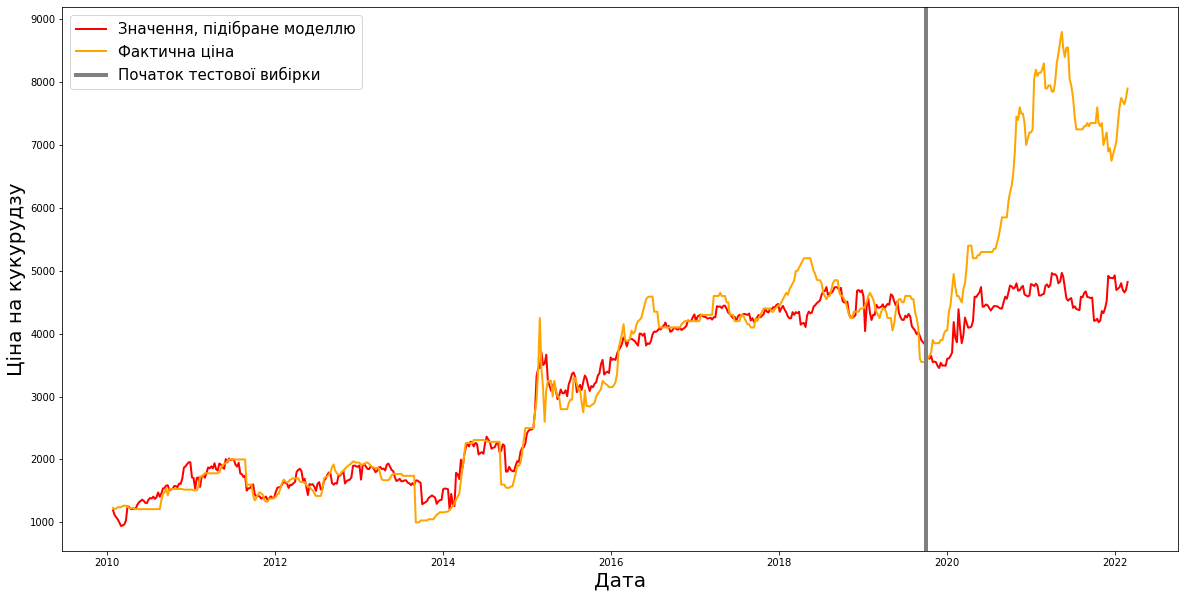

In [143]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(corn_pred.index,corn_pred['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(corn_pred.index,corn_pred['Corn Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на кукурудзу' ,fontsize=20)

ax.axvline(x=datetime.datetime(2019, 10, 4),linewidth=4, color='grey', label = 'Початок тестової вибірки')

ax.legend(loc='upper left', fontsize=15)